<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/maxbergmark/Lab-7/maxbergmark_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Max Bergmark**

# **Abstract**

This lab investigates the difference between the gradient descent method and Newton's method for finding local minima of functions.

#**About the code**

I am the author of the code in its entirety.

# **Set up environment**

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

For the first part, the gradient descent method is analyzed. It is relatively easy to implement, and can sometimes be desirable because it doesn't require knowing the Hessian of the funcion. 

For the second part, Newton's method is used to find minima. Here, the Hessian is known, but generally it could be determined numerically as an iteration step. Also, the functions chosen do not have any cross terms, meaning that the Hessian is a diagonal matrix. The method implemented is not limited to this case, but it was easier to verify correctness with these kinds of functions.

# **Methods**

## 1: Gradient descent method in $\mathbb{R}^n$

The gradient descent method is based on walking in the opposite direction of the gradient. This works because by definition, the gradient points in the direction of the highest growth for the function. 

To ensure that we achieve stability, the step length can't be too long. For this example, I have concluded that a step length over $0.01$ leads to unstable behaviour. 

In [0]:
def gradient_descent(f, df, x):
	a = .01
	conv = []
	x_trail = [x.copy()]
	while np.linalg.norm(df(x)) > 1e-6:
		x -= a*df(x)
		conv.append(np.linalg.norm(x-1))
		x_trail.append(x.copy())

	return x, np.array(x_trail), np.array(conv)

## 2: Newton's method in $\mathbb{R}^n$ 

Newton's method looks similar to the gradient descent method, but also includes a second degree term obtained by the Hessian of the function. Thus, we have so solve a matrix equation system in every step of the iteration. 

This might sound expensive, but the convergence rate makes the extra computation worthwhile. As we will see in the results, Newton's method converges quadratically, which leads to it producing equally accurate results compared to the gradient descent method in a fraction of the time.

Another benefit of the convergence rate of Newton's method is that we can increase the step size significantly without sacrificing stability. For this example, the step size is set to 1, which is 100 times greater than what was possible for gradient descent.

In [0]:
def newtons_method(f, H, df, x):
	conv = []
	a = 1.0
	x_trail = [] 	
	while np.linalg.norm(df(x)) > 1e-6:
		x_trail.append(x.copy())
		x -= a*np.linalg.lstsq(H(x), df(x), rcond = None)[0]
		conv.append(np.linalg.norm(x-1))
	return x, np.array(x_trail), np.array(conv)

# **Results**

## 1: Gradient descent method in $\mathbb{R}^n$

From my testing, the gradient descent method is very sensitive to changes in step size. However, as long as the step size is small enough, the rate of convergence is roughly inversely proportional to the step size, meaning that $\alpha N = constant$, where $\alpha$ is the step size and $N$ is the number of steps required to reach the solution. 

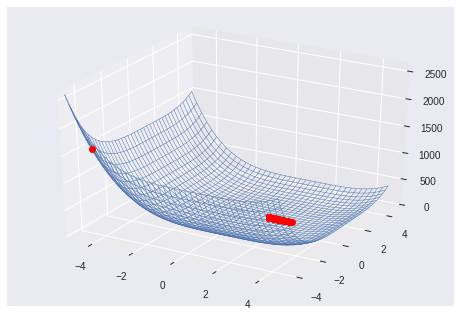

In [15]:
def test_gradient_descent_2D():
	X = np.arange(-5, 5, 0.25)
	Y = np.arange(-5, 5, 0.25)
	X, Y = np.meshgrid(X, Y)
	f_plot = lambda x, y: (x-1)**4 + (y-1)**4
	f = lambda x: np.dot((x-1)**2, (x-1)**2)
	df = lambda x: 4*(x-1)**3

	x_0 = np.array([-4.5, -4.0])
	x_min, x_trail, conv = gradient_descent(f, df, x_0)

	fig = plt.figure()
	ax = fig.gca(projection='3d')
	Z = f_plot(X, Y)
	surf = ax.plot_wireframe(X, Y, Z,
		linewidth=.5, antialiased=True)
	ax.plot(x_trail[:,0], x_trail[:,1], f_plot(x_trail[:,0], x_trail[:,1]), 'ro')
	ax.set_xlim([-5, 5])
	ax.set_ylim([-5, 5])
	plt.show()

test_gradient_descent_2D()

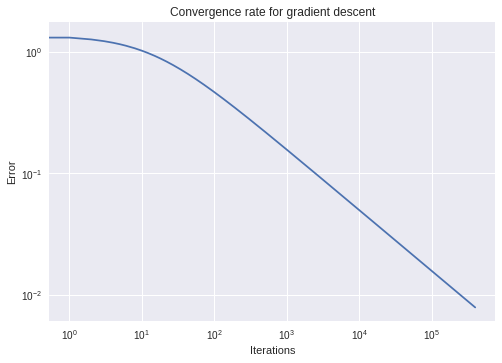

In [51]:
def test_gradient_descent():
    f = lambda x: np.dot((x-1)**2, (x-1)**2)
    df = lambda x: 4*(x-1)**3
    x_0 = np.zeros(2)
    x_min, x_trail, conv = gradient_descent(f, df, x_0)
#    print(x_min)
    plt.loglog(conv, label = "Gradient descent")
    n = len(conv)
#    print((conv[1:]) / (conv[:-1]))
    plt.title("Convergence rate for gradient descent")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

test_gradient_descent()

## 2: Newton's method in $\mathbb{R}^n$ 

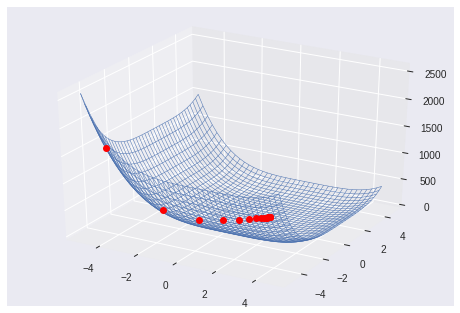

In [36]:
def test_newtons_method_2D():
	X = np.arange(-5, 5, 0.25)
	Y = np.arange(-5, 5, 0.25)
	X, Y = np.meshgrid(X, Y)
	f_plot = lambda x, y: (x-1)**4 + (y-1)**4
	f = lambda x: np.dot((x-1)**2, (x-1)**2)
	df = lambda x: 4*(x-1)**3
	H = lambda x: np.diag(12*(x-1)**2)

	x_0 = np.array([-4.5, -4.0])
	x_min, x_trail, conv = newtons_method(f, H, df, x_0)

	fig = plt.figure()
	ax = fig.gca(projection='3d')
	Z = f_plot(X, Y)
	surf = ax.plot_wireframe(X, Y, Z,
		linewidth=.5, antialiased=True)
	ax.plot(x_trail[:,0], x_trail[:,1], f_plot(x_trail[:,0], x_trail[:,1]), 'ro')
	plt.show()

test_newtons_method_2D()

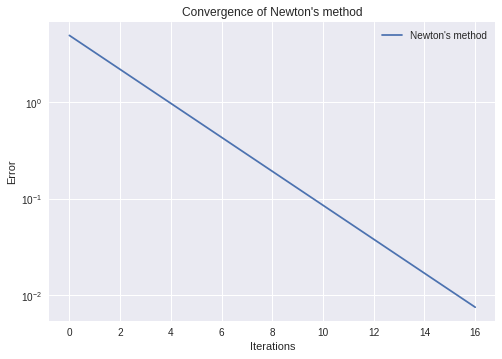

In [49]:
def test_newtons_method():
    f = lambda x: np.dot((x-1)**2, (x-1)**2)
    df = lambda x: 4*(x-1)**3
    H = lambda x: np.diag(12*(x-1)**2)
    x_0 = np.array([-4.5, -4.0])
    
    x_min, x_trail, conv = newtons_method(f, H, df, x_0)
    plt.semilogy(conv, label = "Newton's method")
    plt.legend()
    plt.title("Convergence of Newton's method")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

test_newtons_method()

# **Discussion**

I was not able to see the quadratic convergence of Newton's method, but it definitely converges faster than the gradient descent method. 